总共运行次数:9999


行为值为：
{('A', 'Facebook'): -1.1194782992272212, ('A', 'Quit'): -0.25000375080582476, ('B', 'Facebook'): -1.1261998177726364, ('B', 'Study'): -0.500001014565166, ('C', 'Study'): 2.999999739203228, ('C', 'Sleep'): 0.0, ('D', 'Study'): 9.999999975055859, ('D', 'Pub'): 1.541704929383475, ('E', 'End'): 0}
策略为：
{'A': {'Facebook': 0.0, 'Quit': 1.0}, 'B': {'Facebook': 0.0, 'Study': 1.0}, 'C': {'Study': 1.0, 'Sleep': 0.0}, 'D': {'Study': 1.0, 'Pub': 0.0}}


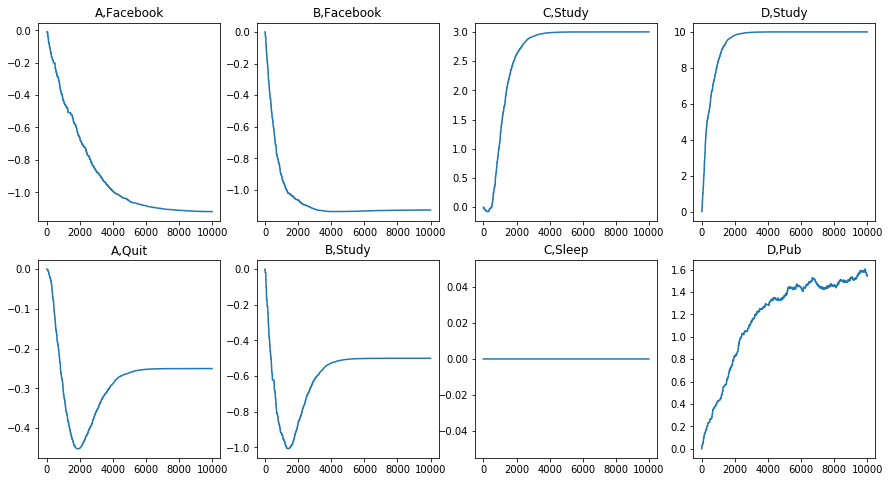

In [2]:
import random

#动作
actions=["Facebook", "Quit", "Study", "Sleep", "Pub"]

#状态
states=["A", "B", "C", "D"]

epsilon=0.4
gama=0.5
learning_rate=0.01

action_list={
    ("A"):((0),(1)),
    ("B"):((0),(2)),
    ("C"):((2),(3)),
    ("D"):((2),(4))
}


#  跳转概率，下一状态, 奖励
p_state_reward={
    ("A", "Facebook"):  ((1.0, "A", -1),(1.0, "A", -1),(1.0, "A", -1)),
    ("A", "Quit"):      ((1.0, "B",  0),(1.0, "B",  0),(1.0, "B",  0)),
    ("B", "Facebook"):  ((1.0, "A", -1),(1.0, "A", -1),(1.0, "A", -1)),
    ("B", "Study"):     ((1.0, "C", -2),(1.0, "C", -2),(1.0, "C", -2)),
    ("C", "Study"):     ((1.0, "D", -2),(1.0, "D", -2),(1.0, "D", -2)),
    ("C", "Sleep"):     ((1.0, "E",  0),(1.0, "E",  0),(1.0, "E",  0)),
    ("D", "Study"):     ((1.0, "E", 10),(1.0, "E", 10),(1.0, "E", 10)),
    ("D", "Pub"):       ((0.2, "B",  1),(0.4, "C",  1),(0.4, "E",  1)),
}

# q_table 初始值
q_value={
    ("A", "Facebook"):  0,
    ("A", "Quit"):      0,
    ("B", "Facebook"):  0,
    ("B", "Study"):     0,  
    ("C", "Study"):     0,  
    ("C", "Sleep"):     0,  
    ("D", "Study"):     0,
    ("D", "Pub"):       0,
    ("E", "End"):       0
}

#构建环境   s, a    r s a
def next_state_reward(state, action):
    alfa=random.random()
    if alfa < 0.2:
        return p_state_reward[state, action][0][1], p_state_reward[state, action][0][2]
    elif alfa >= 0.2 and alfa < 0.6:
        return p_state_reward[state, action][1][1], p_state_reward[state, action][1][2]
    elif alfa >= 0.6 and alfa < 1:
        return p_state_reward[state, action][2][1], p_state_reward[state, action][2][2]
    
def action_max(state):
    if state == "E":
        return "End"
    if q_value[state, actions[action_list[state][0]]] > q_value[state, actions[action_list[state][1]]]:
        return actions[action_list[state][0]]
    else:
        return actions[action_list[state][1]]
    

def action_greedy(state):
    if random.random()<epsilon:
        return actions[action_list[state][random.choice([0,1])]]
    else:
        return action_max(state)


def q_learning():
    state=random.choice(states)
    action=action_greedy(state)

    next_state, reward=next_state_reward(state, action)
    next_action=action_max(next_state)
    
    q_estimate = reward + gama*q_value[next_state,next_action]   
    td_error=q_estimate - q_value[state,action] 
    q_value[state,action]+=learning_rate*td_error 

q_value_arr1=[]
q_value_arr2=[]
q_value_arr3=[]
q_value_arr4=[]
q_value_arr5=[]
q_value_arr6=[]
q_value_arr7=[]
q_value_arr8=[]
def qlearningMain():
    for episode in range(10**4):
        q_learning()
        q_value_arr1.append(q_value["A", "Facebook"])
        q_value_arr2.append(q_value["A", "Quit"])
        q_value_arr3.append(q_value["B", "Facebook"])
        q_value_arr4.append(q_value["B", "Study"])
        q_value_arr5.append(q_value["C", "Study"])
        q_value_arr6.append(q_value["C", "Sleep"])
        q_value_arr7.append(q_value["D", "Study"])
        q_value_arr8.append(q_value["D", "Pub"])
        
    #策略 pi 
    pi={}
    for state in states:
        act=max((q_value[(state, actions[action_list[state][loc]])],actions[action_list[state][loc]]) for loc in range(2))[-1]
        temp={}
        for loc in range(2):
            if actions[action_list[state][loc]]==act:
                temp[actions[action_list[state][loc]]]=1.0
            else:
                temp[actions[action_list[state][loc]]]=0.0

        pi[state]=temp 

    print("总共运行次数:"+str(episode)+"\n")
    print("")
    print("行为值为：")
    print(q_value) 
    print("策略为：")
    print(pi)

qlearningMain()


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 8)
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,5)
ax3 = plt.subplot(2,4,2)
ax4 = plt.subplot(2,4,6)
ax5 = plt.subplot(2,4,3)
ax6 = plt.subplot(2,4,7)
ax7 = plt.subplot(2,4,4)
ax8 = plt.subplot(2,4,8)

plt.sca(ax1)            #
plt.plot(q_value_arr1)
plt.title("A,Facebook")
plt.sca(ax2)            #
plt.plot(q_value_arr2)
plt.title("A,Quit")
plt.sca(ax3)            #
plt.plot(q_value_arr3)
plt.title("B,Facebook")
plt.sca(ax4)            #
plt.plot(q_value_arr4)
plt.title("B,Study")
plt.sca(ax5)            #
plt.plot(q_value_arr5)
plt.title("C,Study")
plt.sca(ax6)            #
plt.plot(q_value_arr6)
plt.title("C,Sleep")
plt.sca(ax7)            #
plt.plot(q_value_arr7)
plt.title("D,Study")
plt.sca(ax8)            #
plt.plot(q_value_arr8)
plt.title("D,Pub")

plt.show()